## credit for any niceness these have goes to Ben Moore-Maley at UBC-MOAD:
https://github.com/UBC-MOAD/PythonNotes/blob/master/windrecipes.ipynb

In [11]:
import windrose
import numpy as np
import cmocean as cmo
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [18]:
u = np.array([1.0, 1, 5])
v = np.array([0, 1.0, 1])

# Calculate wind speed
wspd = np.sqrt(u**2 + v**2)

# Calculate wind direction
wdir = 180 * np.arctan2(v, u) / np.pi
wdir[wdir < 0] = wdir[wdir < 0] + 360

wspd_obs = np.copy(wspd);
wspd_HRDPS = wspd_obs + 2
wdir_obs = np.copy(wdir);
wdir_HRDPS = wdir_obs

AttributeError: 'Rectangle' object has no property 'bins'

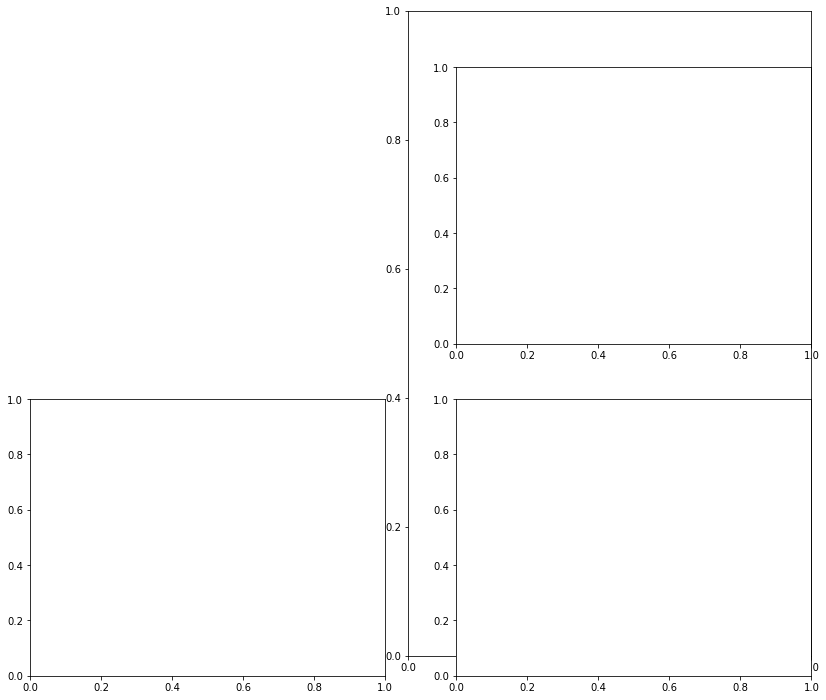

In [23]:
# fact = 0.7
# fig, axs = plt.subplots(2,2, figsize=(20*fact, 16*fact), \
#                         facecolor='w', edgecolor='k')
# axs = axs.ravel()
# ax = WindroseAxes.from_ax(axs[0])
# ax.set_position([xpos, 0.15, 0.4, 0.8])

# # Translate angle to CW from N
# angle = 270 - wdir
# angle[angle < 0] = angle[angle < 0] + 360

# # Plot windrose
# ax.bar(angle, wspd, bins=range(0, 11, 2), nsector=20, normed=True, opening=0.8, edgecolor='k', cmap=cmo.cm.speed)

# # Formatting
# ax.set_ylim([0, 20])
# ax.yaxis.set_ticks([5, 10, 15, 20,25,30,35])
# ax.yaxis.set_ticklabels('')
# ax.xaxis.set_ticklabels('')
# ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
# ax.yaxis.set_ticklabels([f'{tick}%' for tick in [5, 10, 15, 20,25,30,35]])
# ax.set_title(title)
# # Loop through stations and records
# # for keys, xpos in zip([station_keys[:5], station_keys[5:10], station_keys[10:15]], [0, 0.3, 0.6]):
# #     for station, ypos in zip(keys, [0.85, 0.65, 0.45, 0.25, 0.05]):
# #         for record, xshift in zip(['obs', 'HRDPS'], [0, 0.13]):

# #             # Make windrose object
            

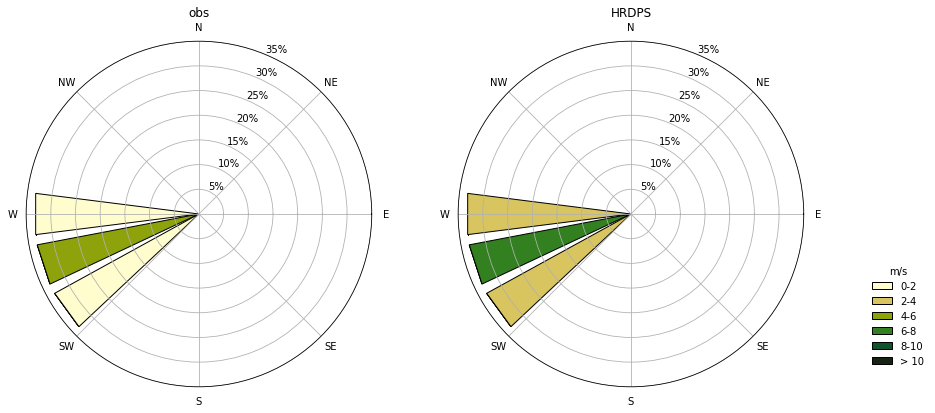

In [24]:
fig = plt.figure(figsize=(12, 6))

# Loop through obs/HRDPS
for wspd, wdir, title, xpos in zip([wspd_obs, wspd_HRDPS], [wdir_obs, wdir_HRDPS], ['obs', 'HRDPS'], [0, 0.5]):

    # Make windrose object
    ax = WindroseAxes.from_ax(fig=fig)
    ax.set_position([xpos, 0.15, 0.4, 0.8])

    # Translate angle to CW from N
    angle = 270 - wdir
    angle[angle < 0] = angle[angle < 0] + 360
    
    # Plot windrose
    ax.bar(angle, wspd, bins=range(0, 11, 2), nsector=20, normed=True, opening=0.8, edgecolor='k', cmap=cmo.cm.speed)

    # Formatting
    ax.set_ylim([0, 20])
    ax.yaxis.set_ticks([5, 10, 15, 20,25,30,35])
    ax.yaxis.set_ticklabels('')
    ax.xaxis.set_ticklabels('')
    ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
    ax.yaxis.set_ticklabels([f'{tick}%' for tick in [5, 10, 15, 20,25,30,35]])
    ax.set_title(title)
    
    # Manually get legend handles (since WindroseAxes.bar returns None)
    handles = ax.get_children()[:6]

# Add legend
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '> 10']
fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(1.05, 0.45), title='m/s')

plt.show()